In [1]:
%pylab inline
plt.rcParams['figure.figsize'] = (8, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from heatlib_var import *

(35000, 0)

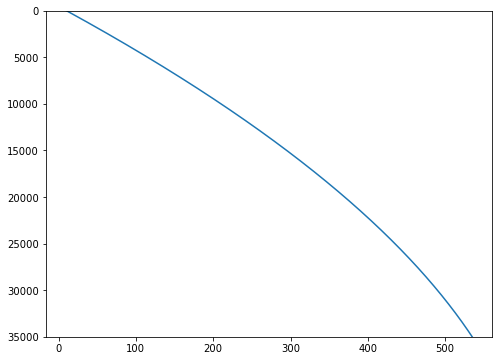

In [49]:
# reseni s konstatni konduktivitou pro celou kuru
N = 14001
m = dict(n=N, k=2.5*np.ones(N-1), H=1e-6*np.ones(N-1),
         tc=35000, T0=10, q=-0.02)
init(m)
plot(m['t'], m['x'])
ylim(m['tc'], 0)

In [50]:
H = 30

In [51]:
# vypocet hustoty tepelneho toku v hloubce 50m (index = 2)
ix = abs(m['x'] - H).argmin()
qix = -(m['k'][ix-1] + m['k'][ix])/2 * (m['t'][ix+1] - m['t'][ix - 1])/2/m['dx']
tc = m['x'][ix]

(30.0, 0)

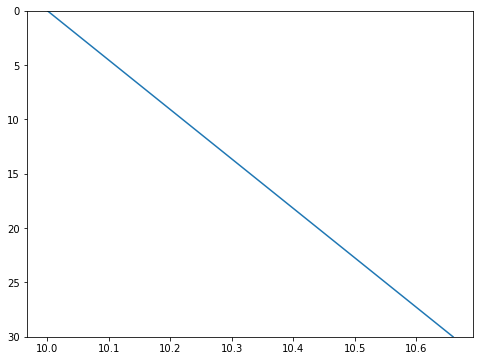

In [52]:
# reseni s konstatni konduktivitou
N = 3001
m = dict(n=N, k=2.5*np.ones(N-1), H=1e-6*np.ones(N-1),
         rho=2700*np.ones(N-1), c=800*np.ones(N-1),
         tc=tc, T0=10, q=qix)
init(m)
plot(m['t'], m['x'])
ylim(m['tc'], 0)

In [53]:
dt = ysec/100
for k in range(100):
    for i in range(100):
        m['T0'] = 10 - 15*cos(m['time']*2*pi/ysec)
        btcs(m, dt)

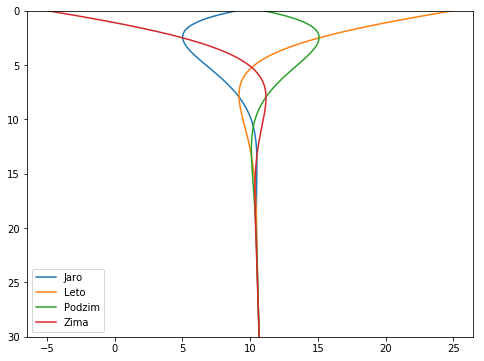

In [54]:
for obdobi in ['Jaro', 'Leto', 'Podzim', 'Zima']:
    for i in range(25):
        m['T0'] = 10 - 15*cos(m['time']*2*pi/ysec)
        btcs(m, dt)
    plot(m['t'], m['x'], label=obdobi)
ylim(m['tc'], 0)
legend()